<a href="https://colab.research.google.com/github/dineshRaja29/CNNinTensorFlowusingKeras/blob/main/CNN_Models_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Header files inclusion

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


#### Data Loading and Pre-processsing

In [ ]:
batch_size = 128
num_classes = 10
epochs = 7

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print("X train is \n ",x_train)


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



#### Graph Generation 

In [ ]:

def plt_dynamic(x, vy, ty):
  print("inside of plt")
  plt.figure(figsize=(10,5))
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Binary Crossentropy Loss')
  plt.title('\nBinary Crossentropy Loss VS Epochs')
  plt.legend()
  plt.grid()
  plt.show()
  print("leaving the plt")

## Model I

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 447s 7ms/step - loss: 0.1576 - acc: 0.9522 - val_loss: 0.0423 - val_acc: 0.9854
Epoch 2/7
60000/60000 [==============================] - 446s 7ms/step - loss: 0.0679 - acc: 0.9799 - val_loss: 0.0372 - val_acc: 0.9876
Epoch 3/7
60000/60000 [==============================] - 440s 7ms/step - loss: 0.0515 - acc: 0.9840 - val_loss: 0.0308 - val_acc: 0.9888
Epoch 4/7
60000/60000 [==============================] - 442s 7ms/step - loss: 0.0424 - acc: 0.9875 - val_loss: 0.0272 - val_acc: 0.9903
Epoch 5/7
60000/60000 [==============================] - 442s 7ms/step - loss: 0.0355 - acc: 0.9890 - val_loss: 0.0235 - val_acc: 0.9924
Epoch 6/7
60000/60000 [==============================] - 438s 7ms/step - loss: 0.0309 - acc: 0.9903 - val_loss: 0.0324 - val_acc: 0.9894
Epoch 7/7
60000/60000 [==============================] - 446s 7ms/step - loss: 0.0289 - acc: 0.9907 - val_loss: 0.0219 - val_acc

inside of plt


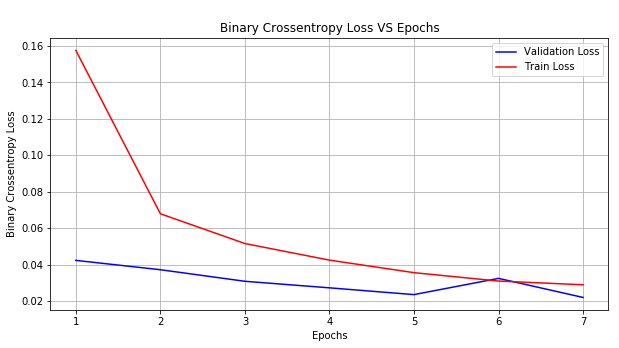

leaving the plt


In [ ]:
x = list(range(1,epochs+1))
train_acc_1  = history.history['acc']
val_acc_1    = history.history['val_acc']
vy_1 = history.history['val_loss']
ty_1 = history.history['loss']
plt_dynamic(x, vy_1, ty_1)

## Model II

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 1112s 19ms/step - loss: 0.1823 - acc: 0.9438 - val_loss: 0.1494 - val_acc: 0.9609
Epoch 2/7
60000/60000 [==============================] - 1110s 18ms/step - loss: 0.0578 - acc: 0.9829 - val_loss: 0.0317 - val_acc: 0.9890
Epoch 3/7
60000/60000 [==============================] - 1112s 19ms/step - loss: 0.0389 - acc: 0.9886 - val_loss: 0.0278 - val_acc: 0.9913
Epoch 4/7
60000/60000 [==============================] - 1111s 19ms/step - loss: 0.0305 - acc: 0.9906 - val_loss: 0.0435 - val_acc: 0.9859
Epoch 5/7
60000/60000 [==============================] - 1117s 19ms/step - loss: 0.0247 - acc: 0.9926 - val_loss: 0.0303 - val_acc: 0.9905
Epoch 6/7
60000/60000 [==============================] - 1108s 18ms/step - loss: 0.0211 - acc: 0.9938 - val_loss: 0.0345 - val_acc: 0.9899
Epoch 7/7
60000/60000 [==============================] - 1114s 19ms/step - loss: 0.0183 - acc: 0.9943 - val_loss: 0.

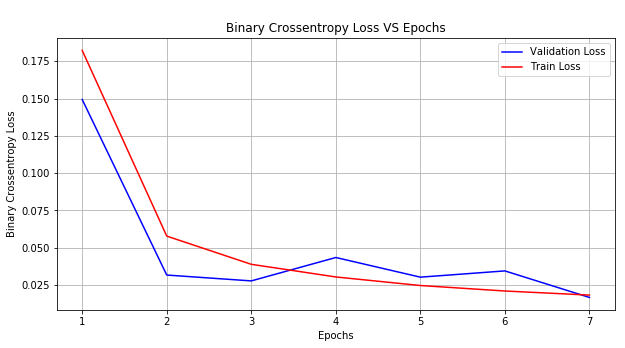

leaving the plt


In [ ]:
model_ii = Sequential()
model_ii.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model_ii.add(Conv2D(32, (5, 5), activation='relu'))
model_ii.add(Conv2D(64, (5, 5), activation='relu'))
model_ii.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model_ii.add(Conv2D(64, (5, 5), activation='relu', padding = 'same'))
model_ii.add(Conv2D(64, (5, 5), activation='relu', padding ='same'))
model_ii.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))

model_ii.add(Dropout(0.25))
model_ii.add(Flatten())
model_ii.add(Dense(128, activation='relu'))
model_ii.add(BatchNormalization())
model_ii.add(Dropout(0.5))
model_ii.add(Dense(num_classes, activation='softmax'))

model_ii.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model_ii.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_ii.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
x = list(range(1,epochs+1))
train_acc_1  = history.history['acc']
val_acc_1    = history.history['val_acc']
vy_1 = history.history['val_loss']
ty_1 = history.history['loss']
plt_dynamic(x, vy_1, ty_1)


## Model III

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 696s 12ms/step - loss: 2.2940 - acc: 0.1882 - val_loss: 2.9651 - val_acc: 0.1135
Epoch 2/7
60000/60000 [==============================] - 697s 12ms/step - loss: 1.7931 - acc: 0.2850 - val_loss: 2.9682 - val_acc: 0.1185
Epoch 3/7
60000/60000 [==============================] - 686s 11ms/step - loss: 1.4098 - acc: 0.4123 - val_loss: 1.7433 - val_acc: 0.2019
Epoch 4/7
60000/60000 [==============================] - 690s 12ms/step - loss: 1.1911 - acc: 0.5176 - val_loss: 1.1236 - val_acc: 0.5330
Epoch 5/7
60000/60000 [==============================] - 689s 11ms/step - loss: 1.0382 - acc: 0.5946 - val_loss: 0.9968 - val_acc: 0.5959
Epoch 6/7
60000/60000 [==

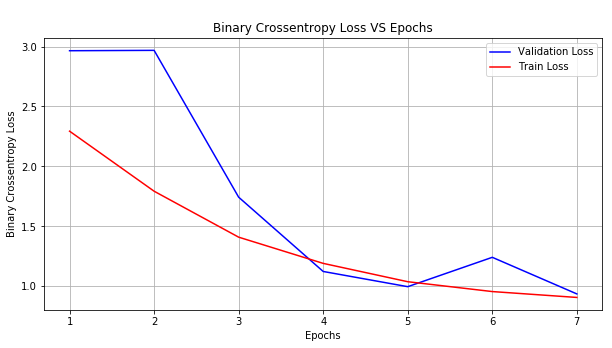

leaving the plt


In [ ]:
model_iii = Sequential()
model_iii.add(Conv2D(16, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape, padding='same'))
model_iii.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_iii.add(Conv2D(32, (7, 7), activation='relu', padding='same'))
model_iii.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_iii.add(Conv2D(32, (7, 7), activation='relu', padding='same'))
model_iii.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_iii.add(Conv2D(64, (7, 7), activation='relu', padding='same'))
model_iii.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_iii.add(Conv2D(64, (7, 7), activation='relu', padding='same'))
model_iii.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_iii.add(Conv2D(64, (7, 7), activation='relu', padding='same'))
model_iii.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_iii.add(Conv2D(64, (7, 7), activation='relu', padding='same'))
model_iii.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_iii.add(Dropout(0.25))
model_iii.add(Flatten())
model_iii.add(Dense(128, activation='relu'))
model_iii.add(BatchNormalization())
model_iii.add(Dropout(0.5))
model_iii.add(Dense(num_classes, activation='softmax'))

model_iii.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model_iii.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_iii.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
x = list(range(1,epochs+1))
train_acc_1  = history.history['acc']
val_acc_1    = history.history['val_acc']
vy_1 = history.history['val_loss']
ty_1 = history.history['loss']
plt_dynamic(x, vy_1, ty_1)


In [ ]:
from prettytable import PrettyTable
x = PrettyTable()
x.add_column("S.NO",[1,2,3])
x.add_column("#f CNN Layers",[3,5,7])
x.add_column("Kernel Description",["3x3","5x5","7x7"])
x.add_column("Train Accuracy",["99.07","99.43","65.72"])
x.add_column("Validation Accuracy",["99.31" ,"99.56","58.55" ])
print(x)


+------+---------------+--------------------+----------------+---------------------+
| S.NO | #f CNN Layers | Kernel Description | Train Accuracy | Validation Accuracy |
+------+---------------+--------------------+----------------+---------------------+
|  1   |       3       |        3x3         |     99.07      |        99.31        |
|  2   |       5       |        5x5         |     99.43      |        99.56        |
|  3   |       7       |        7x7         |     65.72      |        58.55        |
+------+---------------+--------------------+----------------+---------------------+
